In [1]:
import numpy as np
from pylab import *

# Homework 1: Dust Models for the ISM
In this assignment, we're going to create dust models for the bulk interstellar medium. 
Over the course of this assignment, we'll build up our dust model in terms of:
1. the size distribution: most generally defined in terms of the number of particles of size $a$ per size bin $da$ distributed between the minimum dust size, $a_{min}$ and the maximum dust size $a_{max}$ in a power-law of the form: $n(a) \propto a^{-p} da$

2. the properties of the dust grains: determined by the composition and assumed physical structure of the dust (ranging from perfect sphere to fluffy aggregate) which determines the optical properties and material density of grains 

As you work through the parts of each question, you can write the code in the cell underneath each part and any written responses can be added in corresponding markdown cells (like this one). For this first assignment, I have provided some scaffolding on the coding end meant to get you started and demonstrate some ways you can go about formatting your solutions. You are welcome to amend any of the provided code or not use any of it at all, as long as your solutions address each question in full. 

## I. Size Distribution
### part a. 
Write a python function to calculate a normalized distribution of dust sizes $n(a) da$ for a given input dust size $a$ given $a_{min}$, $a_{max}$, $p$ and total number density of dust $n_{d}$ across all sizes.

Recall that: 

$n_d = \int_{a_{min}}^{a_{max}} n_0 (a/a_{min})^{-p} da$

Using your function, calculate $n(a)da$ vs. $a$ for a set of fiducial ISM values:

$a_{min} = 0.005 \mu m, \\
a_{max} = 1 \mu m, \\
p=3.5$

assuming a total number density $n_d = 1 cm^{-3}$, where $a$ should be an array of sizes from $a_{min}$ to $a_{max}$. 
Check your function by taking a numerical integral of the ism distribution you calculated using some form of numerical integration like `numpy.trapz`. The value of your numerical integral over the array of size bins should approximately equal $n_d$. How does the error in this integral depend on the number of points in your $a$ array? Is it better or worse if $a$ is logarithmically or linearly spaced?




In [2]:
# a): function to return size distribution
def n_(a_bins,amin=0.005,amax=1,p=3.5,n_d=10):
    pre_total = (amin**p) * (amax**(-p+1) - amin**(-p+1)) / (-p+1) # analytical solution of the integral
    n_0 = n_d/pre_total # normalization to calculate the value of n_0
    if n_0 < 0:
        print('warning n_0 < 0, non-physical solution')
        return 0
    else:
        return n_0 * (a_bins/amin)**(-p)

# calculate n_ism for ISM parameters
amin = 0.005
amax = 1
p = 3.5
n_d = 1 

# size bins from amin to amax
for n_bins in [50,100,200]:
    a_bins_lin = np.linspace(amin,amax,n_bins)
    a_bins = np.logspace(np.log10(amin),np.log10(amax),n_bins)
    # n_ism = n(a) da for ISM parameters
    n_ism_lin = n_(a_bins_lin,amin,amax,p,n_d)
    n_ism = n_(a_bins,amin,amax,p,n_d)
    nd_num_lin = np.trapz(n_ism_lin,a_bins_lin)
    nd_num = np.trapz(n_ism,a_bins)
    err_lin = n_d/nd_num_lin - 1.
    err = n_d/nd_num - 1.
    print('Number of bins = {}, linear bins error = {}, log bins error= {}'.format(n_bins, err_lin, err))

Number of bins = 50, linear bins error = -0.8046140860741153, log bins error= -0.015125980383497217
Number of bins = 100, linear bins error = -0.6222644473950809, log bins error= -0.003745959452650993
Number of bins = 200, linear bins error = -0.36177097639569367, log bins error= -0.0009295804991692469


### part a: solutions
The error decreases with more points in the array, but is greatly improved with more logarithmic bins because there's a big dynamic range between $a_{min}$ and $a_{max}$. (Since this is a negative power-law, there's a lot of contribution at the small size bins that isn't captured well in the linear scale.)

**General Feedback**
* Check the documentation for functions you use *cough cough* `np.logspace`  
* There is no level of coding expertise that can save you from basic typos and tiny setup errors propagating through your entire code. Reguarly quality checking your inputs, i.e. does this array actually contain the numbers I think it does?, by printing them out or plotting them can help you find them early before it gets too difficult to disentangle down the line. 

### part b. 
Once you're happy with how things are looking in the above parts, write another function to use what you have so far to calculate the average size of a dust particle $<a>$ for some size distribution $n(a) da$ and use it calculate the mean size of the distribution in part a. 



In [157]:
# b). function to return mean size for a given size distribution
def mean_a(a_bins, n_dist):
    tot_a = np.trapz(n_dist*a_bins,a_bins) # numerical integral of the total area
    tot_n = np.trapz(n_dist,a_bins) #numerical integral of the total number
    return tot_a/tot_n #average area = total area / number 

a_bysize_ism = mean_a(a_bins,n_ism)
print(a_bysize_ism)

0.008326960152533494


### part b: solutions

According to this the mean size of our input distribution is 0.008 microns

### c.
Now calculate the mean mass of a particle for the same distribution, assuming that each dust particle is a sphere with radius $a$ and a material density of $\rho_s = 3.3 \mathrm{ \ g \ cm^{-3}}$. How does this compare to the mass of a hydrogen atom? What is the typical size of the average mass particle? 



In [221]:
# c). mass distribution
def m_(a_bins, n_dist, rho_s=3.3):
    rho_s *= (1e-4**3) # there are 1e-4 cm in a micron
    return (a_bins)**3*(4*pi/3.)*(rho_s)

def mean_m(a_bins,n_dist,m_dist):
    tot_m = np.trapz(m_dist,a_bins) # total mass integral
    tot_n = np.trapz(n_dist,a_bins) # total number
    return tot_m/tot_n # average mass = total mass/ total number

m_ave_ism = mean_m(a_bins,n_ism,m_(a_bins,n_ism))
mH = 1.67e-24 # mass of a hydrogen atom in grams

print( r'{:.2e} g or {:.2e} hydrogen atoms'.format(m_ave_ism, m_ave_ism/mH))

a_bymass_ism = (m_ave_ism/(3.3)/(4*pi/3.))**(1/3.) * 1e4 # since average mass = average size by mass **3 * 4pi/3 * material density + converting to microns

print(a_bymass_ism)

3.45e-12 g or 2.07e+12 hydrogen atoms
0.6298396380369534


### part c: solutions
The average mass of a sub-micron dust grain is still a lot of atoms, which makes sense since atoms are ... you know... small and even small rocks are still comprised of many atoms in a crystal structure. 

The average size by mass is simply the size of the average mass particle, which here is 0.62 microns.

### d. 
So far, mathematically, we've essentially been treating the size distribution as a kind of probabibility density function. This means we can use a cumulative sum function to calculate the cumulative distribution function (CDF) from $a_{min}$ to $a_{max}$ of the cumulative number density distribution and the cumulative mass distribution. Make a plot of the cumulative fraction at each size by number ($F_{N}(<a)$) and by mass ($F_{M}(<a)$), annotating the sizes you calculated in part c and d on the plot. 

Recall: A CDF is normalized such that it goes from 0 to 1 across the range of its variable.

Based on the ISM distribution, are most of the particles at smaller or larger sizes? Is most of the mass in particles at smaller or larger sizes?

Text(0.5, 1.0, 'CDF for ISM-like dust size distribution')

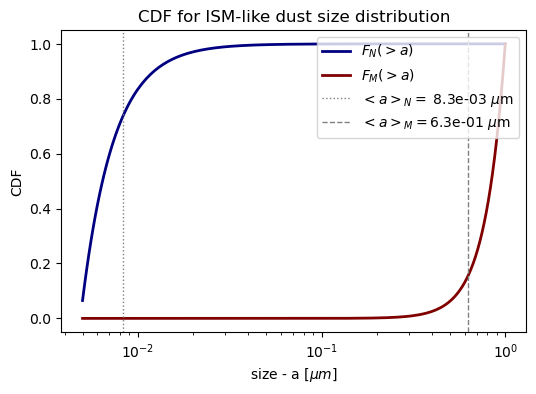

In [163]:
# d). CDF for F by number vs. F by mass
da = np.gradient(a_bins)
CDF_N = np.cumsum(n_ism*da)/np.sum(n_ism*da)
CDF_M = np.cumsum(m_(a_bins, n_ism)*da)/np.sum(m_(a_bins,n_ism)*da)

f,ax=subplots(1,dpi=100)
ax.plot(a_bins, CDF_N,lw=2,label=r'$F_N(<a)$',color='navy')
ax.plot(a_bins, CDF_M,lw=2,label=r'$F_M(<a)$',color='maroon')
ax.set_xscale('log')
ax.axvline(a_bysize_ism,ls='dotted',color='gray',lw=1,label=r'$<a>_N =$ {:.1e} $\mu$m'.format(a_bysize_ism))
ax.axvline(a_bymass_ism,ls='dashed',color='gray',lw=1,label=r'$<a>_M =${:.1e} $\mu$m'.format(a_bymass_ism))
ax.set_xlabel(r'size - a [$\mu m$]')
ax.set_ylabel(r'CDF')
ax.legend(loc=1)
ax.set_title('CDF for ISM-like dust size distribution')

### part d: solutions

Here, we can write the cumulative distribution function (or fraction of number / fraction of mass ) as a cumulative integral sum of the distribution divided by the total integral sum of the distribution. 
Since I'm using np.cumsum here, I have to make sure to calculate the bin widths $da$ for the computation of the integral. 


From the $F(<N)$ plot you can see that ~ 80% of grains are at sizes smaller than 0.01 microns. So most of the grains themselves are quite small, which matches with what we know about the power-law distribution.

However, from the $F(<M)$ plot, you can see 50% of the total mass is contained within particles at sizes greater than 0.8 microns. 

**General Feedback**
* The zero order quality checks to make here are:
    * to make sure that the mean sizes you calculated are within the bounds of the cumulative functions
    * to make sure that the cumulative distribution goes from 0 to 1

## II. Optical Properties
Here we'll be using an open source code package called [optool](https://github.com/cdominik/optool/blob/master/UserGuide.pdf) to calculate the dust opacities of our dust grains using Mie Theory. *Note that if you are not using this notebook on the binder hub at CCA, you will need to install optool on our own machine using the installation instructions in the User Guide in order to run this part*

### part a.
We'll start by using `optool`'s python interface to initialize a particle object with an astrosilicate composition for a calculation with the default optical properties using Mie Theory for an ism-like distribution. We'll print the average size attribute of the optool particle object. It should match your answer for part Ib above. 

The information about dust model that `optool` can take as input are detailed in Section 4 of the linked manual. 
The output information that `optool` calculates is stored as attributes of the particle object, described in Section 7 of the manual. 

We are going to take the extinction opacity from the dust model and compare its shape to the measured average Milky Way extinction curve between 0.1 and 2.2 microns. 

For what wavelengths does this simple model capture the shape and behavior of the interstellar extinction curve the best?

In [4]:
import optool
from astropy.io import fits

amin = 0.005
amax = 1
p = 3.5

#define the input command for optool
cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p)

#run optool with the input command in the python interface
pism = optool.particle(cmd)

#access the average size attribute for the input size distribution
print(pism.a1)

#wavelength and extinction opacities for the calculation
wav_model = pism.lam # wavelength in microns
kext_model = pism.kext.squeeze() # kappa_ext in g/cm^2

#normalization factor so that kext = 1 at V band 
k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
kext_model /= k_norm

#load in milky way extinction curve 
hdu1 = fits.open('milkyway_diffuse_001.fits')[1]
wav_mw = 1./hdu1.data['WAVELENGTH'] #wavelength in microns
Aext_mw = hdu1.data['Av/E(B-V)']/3.1 #A(wav)/A(V)

#plot the model and the mw extinction curve
f,ax = subplots(1,dpi=100)
ax.plot(wav_model, kext_model,lw=2,label='dust model: $\kappa(\lambda)/\kappa(V)$')
ax.plot(wav_mw, Aext_mw,lw=2, label='MW ext.: $A(\lambda)/A(V)$')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_xscale('log')
ax.set_ylabel('Extinction')
ax.legend()

ModuleNotFoundError: No module named 'optool'

### part a: solutions

The simple astrosilicate ISM model captures the behavior at longer wavelengths ($\lambda > 0.8 \mu m$) fairly well. In the interstellar extinction curve, there is a broad feature at $0.22 \mu m$, that is not well captured by the model.

### part b.

You'll notice that several features in the measured extinction curve are notably absent from the model. Using the procedure above for calculating model extinctions using `optool`, conduct a numerical experiment varying one variable at a time and generate different dust models to investigate how the features in the model extinction curve change for different values of:

i) $a_{max}$

ii) power-law index $p$

iii) grain material compositions (you may want to add grain materials to the astrosilicate mix rather than changing the entire composition)

the exact values you test are up to you, but bonus points for motivating your choices. Cite any references you use.

Make a figure like the one in part IIa to show the results for the different dust models you test against the observed extinction and describe the behavior of the models with the different parameters. Based on your results, what kind of changes would allow the dust model to better capture the behavior/features in the interstellar extinction curve and why?


NameError: name 'optool' is not defined

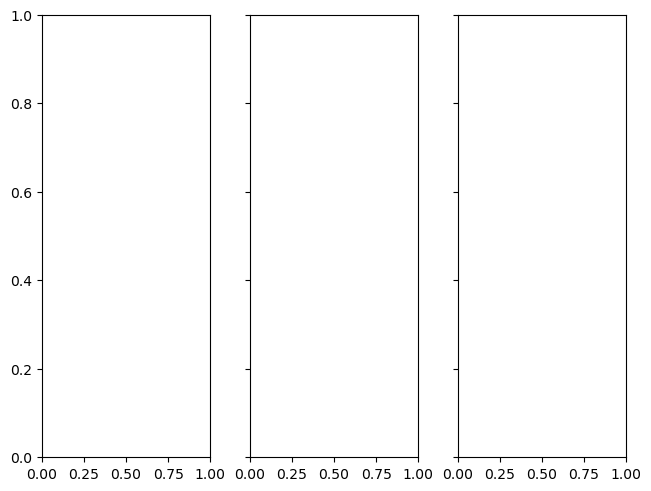

In [3]:
f,ax=subplots(1,3,constrained_layout=True,dpi=100,sharey=True)

amin = 0.005
amax = 1
p = 3.5

#Changing max grain size
sca(ax[0])
for amax,ls in zip([0.2, 0.5, 1.5],['dotted','dashed','solid']):
    cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p)

    #run optool with the input command in the python interface
    pm = optool.particle(cmd)

    #wavelength and extinction opacities for the calculation
    wav_model = pm.lam # wavelength in microns
    kext_model = pm.kext.squeeze() # kappa_ext in g/cm^2

    #normalization factor so that kext = 1 at V band 
    k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
    kext_model /= k_norm
    

    plot(wav_model, kext_model,lw=1.1,ls=ls,label=r'$a_{max}$'+r' = {:.2f} $\mu m$'.format(amax),color='gray')
legend()
plot(wav_mw, Aext_mw,lw=2,color='black')
xscale('log')
ylabel('Extinction')
title('max grain size')

amin = 0.005
amax = 1
p = 3.5

#Changing power-law 
sca(ax[1])
for p,ls in zip([2.5, 3.0, 3.5],['dotted','dashed','solid']):
    cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p)

    #run optool with the input command in the python interface
    pm = optool.particle(cmd)

    #wavelength and extinction opacities for the calculation
    wav_model = pm.lam # wavelength in microns
    kext_model = pm.kext.squeeze() # kappa_ext in g/cm^2

    #normalization factor so that kext = 1 at V band 
    k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
    kext_model /= k_norm
    

    plot(wav_model, kext_model,lw=1.1,ls=ls,label=r'$p$ = {:.1f}'.format(p),color='gray')
plot(wav_mw, Aext_mw,lw=2,color='black')
legend()
xscale('log')
ylim(0,5)
xlabel(r'$\lambda$ [$\mu$m]')
title(r'power-law index $p$')

amin = 0.005
amax = 1
p = 3.5

#Changing material composition
sca(ax[2])
for material,ls in zip(['astrosil', 'astrosil gra', 'astrosil iron'],['dotted','dashed','solid']):
    cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material=material, amin=amin, amax= amax, p = p)

    #run optool with the input command in the python interface
    pm = optool.particle(cmd)

    #wavelength and extinction opacities for the calculation
    wav_model = pm.lam # wavelength in microns
    kext_model = pm.kext.squeeze() # kappa_ext in g/cm^2

    #normalization factor so that kext = 1 at V band 
    k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
    kext_model /= k_norm
    

    plot(wav_model, kext_model,lw=1.1,ls=ls,label=material,color='gray')
plot(wav_mw, Aext_mw,lw=2,color='black')
legend()
xscale('log')
title('composition')


### part b: solutions

Changing the maximum grain